In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [42]:
data = pd.read_csv('AnscombeQuartet.txt', sep=',', header=None, skiprows=1)

In [43]:
data

,0,1,2,3,4,5,6,7
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [44]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])

In [45]:
data.columns = header

In [46]:
data.index = [1,2,3,4,5,6,7,8,9,10,11]

In [47]:
data

dat Dataset 1        Dataset 2       Dataset 3        Dataset 4       
val         x      y         x     y         x      y         x      y
1          10   8.04        10  9.14        10   7.46         8   6.58
2           8   6.95         8  8.14         8   6.77         8   5.76
3          13   7.58        13  8.74        13  12.74         8   7.71
4           9   8.81         9  8.77         9   7.11         8   8.84
5          11   8.33        11  9.26        11   7.81         8   8.47
6          14   9.96        14  8.10        14   8.84         8   7.04
7           6   7.24         6  6.13         6   6.08         8   5.25
8           4   4.26         4  3.10         4   5.39        19  12.50
9          12  10.84        12  9.13        12   8.15         8   5.56
10          7   4.82         7  7.26         7   6.42         8   7.91
11          5   5.68         5  4.74         5   5.73         8   6.89

In [48]:
#data.to_latex('hola.tex')

In [49]:
data.columns = ['$x_1$','$y_1$','$x_2$','$y_2$','$x_3$','$y_3$','$x_4$','$y_4$']
data

,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
1,10,8.04,10,9.14,10,7.46,8,6.58
2,8,6.95,8,8.14,8,6.77,8,5.76
3,13,7.58,13,8.74,13,12.74,8,7.71
4,9,8.81,9,8.77,9,7.11,8,8.84
5,11,8.33,11,9.26,11,7.81,8,8.47
6,14,9.96,14,8.10,14,8.84,8,7.04
7,6,7.24,6,6.13,6,6.08,8,5.25
8,4,4.26,4,3.10,4,5.39,19,12.50
9,12,10.84,12,9.13,12,8.15,8,5.56
10,7,4.82,7,7.26,7,6.42,8,7.91


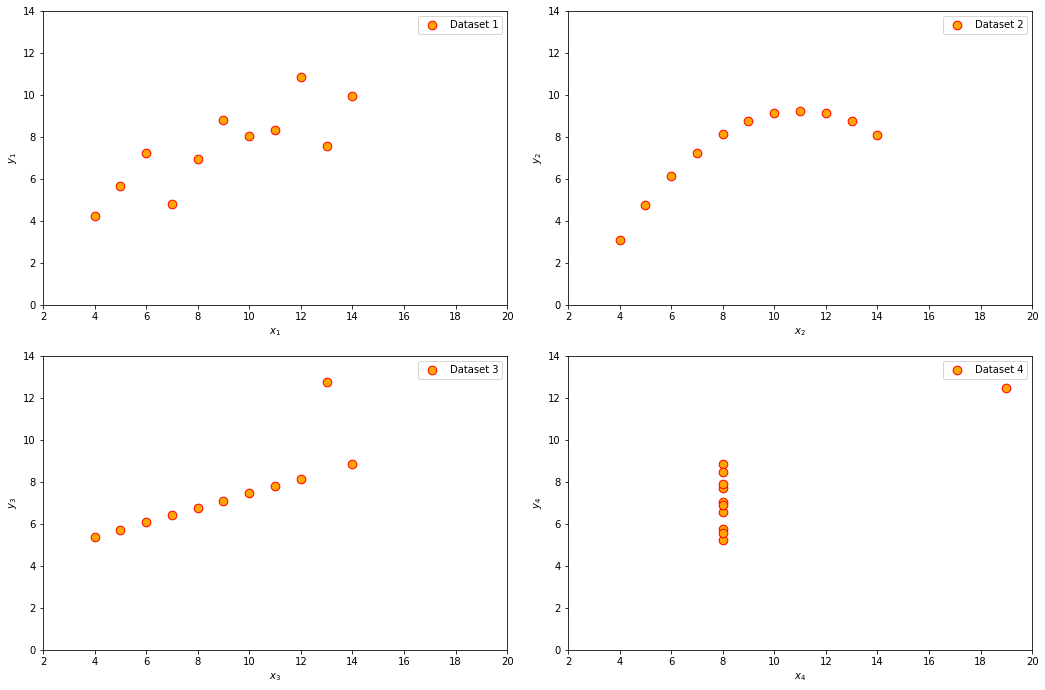

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout(pad=3.0)

parametros = {'marker':'o', 'c':'orange', 'edgecolor':'red', 's':75, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_1$','$y_1$', label='Dataset 1', ax=axes[0,0], **parametros)
data.plot.scatter('$x_2$','$y_2$', label='Dataset 2', ax=axes[0,1], **parametros)
data.plot.scatter('$x_3$','$y_3$', label='Dataset 3', ax=axes[1,0], **parametros)
data.plot.scatter('$x_4$','$y_4$', label='Dataset 4', ax=axes[1,1], **parametros)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, i+1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    X_pred =np.arange(0,21,1)
    X_pred.shape = (-1,1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    
    return X, Y, X_pred, Y_pred

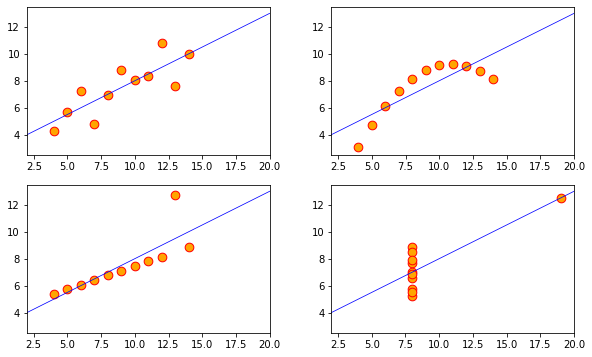

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

i = 0
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred = regresionLineal(data, i)
        ax.scatter(X, Y, marker = 'o', c='orange', s=75, edgecolor='red')
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75)
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        i += 2

## Punto de vista

Creo que este artículo nos da un panorama de la utilidad de las gráficas contra las medidas estadísticas más comunes. Esto se hace por medio de ejemplos que nos permiten comprender la escencia de la estadística. Esto es, que los valores dados por las medidas estadísticas más simples no son más que formas de resumir datos en una dimensión, por lo que son facilmente manipulables y sin lugar a dudas, poco confiables como único indicador de tendencia de los datos.

Por otro lado, aunque no sea necesariamente preciso (en forma de un solo valor), las gráficas nos permiten notar tendencias y patrones. Esto, en vez de darnos una descripción precisa de los datos, nos permite ver el panorama de los datos con los que vamos a trabajar. Mediante el uso de gráficas para la visualización de datos, podemos generar una mejor comprensión del fenómeno evaluado, e incluso podemos proponer modelos iniciales (como una regresión) para describir al fenómeno observado.

## Cálculos

In [66]:
x1 = data['$x_1$'].to_numpy()
y1 = data['$y_1$'].to_numpy()
x2 = data['$x_2$'].to_numpy()
y2 = data['$y_2$'].to_numpy()
x3 = data['$x_3$'].to_numpy()
y3 = data['$y_3$'].to_numpy()
x4 = data['$x_4$'].to_numpy()
y4 = data['$y_4$'].to_numpy()

In [71]:
mean_x1 = np.average(x1)
mean_x2 = np.average(x2)
mean_x3 = np.average(x3)
mean_x4 = np.average(x4)
var_x1 = np.var(x1)
var_x2 = np.var(x2)
var_x3 = np.var(x3)
var_x4 = np.var(x4)
mean_y1 = np.average(y1)
mean_y2 = np.average(y2)
mean_y3 = np.average(y3)
mean_y4 = np.average(y4)
var_y1 = np.var(y1)
var_y2 = np.var(y2)
var_y3 = np.var(y3)
var_y4 = np.var(y4)
corr_1 = np.corrcoef(x1, y1)[1,0]
corr_2 = np.corrcoef(x2, y2)[1,0]
corr_3 = np.corrcoef(x3, y3)[1,0]
corr_4 = np.corrcoef(x4, y4)[1,0]
model_1 = LinearRegression()
model_1.fit(x1.reshape(-1, 1), y1)
model_2 = LinearRegression()
model_2.fit(x2.reshape(-1, 1), y2)
model_3 = LinearRegression()
model_3.fit(x3.reshape(-1, 1), y3)
model_4 = LinearRegression()
model_4.fit(x4.reshape(-1, 1), y4)
pred_1 = model_1.score(x1.reshape(-1, 1),y1)
pred_2 = model_2.score(x2.reshape(-1, 1),y2)
pred_3 = model_3.score(x3.reshape(-1, 1),y3)
pred_4 = model_4.score(x4.reshape(-1, 1),y4)

In [72]:
print('Medias de x:')
print('x1 : '+str(mean_x1))
print('x2 : '+str(mean_x2))
print('x3 : '+str(mean_x3))
print('x4 : '+str(mean_x4))

Medias de x:
x1 : 9.0
x2 : 9.0
x3 : 9.0
x4 : 9.0


In [73]:
print('Varianza muestral de x:')
print('v1 : '+str(var_x1))
print('v2 : '+str(var_x2))
print('v3 : '+str(var_x3))
print('v4 : '+str(var_x4))

Varianza muestral de x:
v1 : 10.0
v2 : 10.0
v3 : 10.0
v4 : 10.0


In [74]:
print('Medias de y:')
print('y1 : '+str(mean_y1))
print('y2 : '+str(mean_y2))
print('y3 : '+str(mean_y3))
print('y4 : '+str(mean_y4))

Medias de y:
y1 : 7.500909090909093
y2 : 7.50090909090909
y3 : 7.5
y4 : 7.500909090909091


In [75]:
print('Varianza muestral de y:')
print('v1 : '+str(var_y1))
print('v2 : '+str(var_y2))
print('v3 : '+str(var_y3))
print('v4 : '+str(var_y4))

Varianza muestral de y:
v1 : 3.7520628099173554
v2 : 3.752390082644628
v3 : 3.747836363636364
v4 : 3.7484082644628103


In [77]:
print('Correlaciones de x, y')
print('corr1 : '+str(corr_1))
print('corr2 : '+str(corr_2))
print('corr3 : '+str(corr_3))
print('corr4 : '+str(corr_4))

Correlaciones de x, y
corr1 : 0.8164205163448399
corr2 : 0.8162365060002428
corr3 : 0.8162867394895984
corr4 : 0.8165214368885029


In [96]:
print('Regresiones lineales de cada dataset con R^2:')
print('1 : '+' m = '+ str(round(model_1.coef_[0],2)) + ' b = '+ str(round(model_1.intercept_,2)) + ' R^2 = ' +str(round(pred_1,2)))
print('2 : '+' m = '+ str(round(model_2.coef_[0],2)) + ' b = '+ str(round(model_2.intercept_,2)) + ' R^2 = ' +str(round(pred_2,2)))
print('3 : '+' m = '+ str(round(model_3.coef_[0],2)) + ' b = '+ str(round(model_3.intercept_,2)) + ' R^2 = ' +str(round(pred_3,2)))
print('4 : '+' m = '+ str(round(model_4.coef_[0],2)) + ' b = '+ str(round(model_4.intercept_,2)) + ' R^2 = ' +str(round(pred_4,2)))

Regresiones lineales de cada dataset:
1 :  m = 0.5 b = 3.0 R^2 = 0.67
2 :  m = 0.5 b = 3.0 R^2 = 0.67
3 :  m = 0.5 b = 3.0 R^2 = 0.67
4 :  m = 0.5 b = 3.0 R^2 = 0.67


## Gráficos retocados

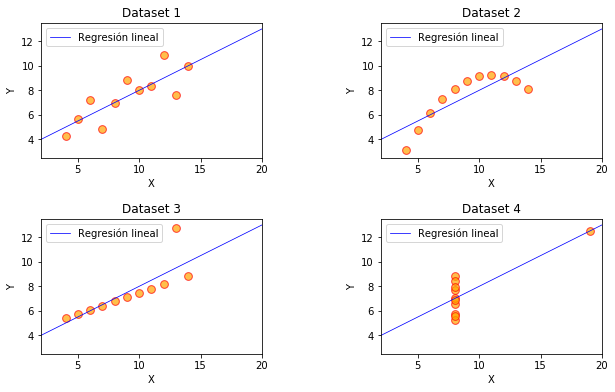

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

i = 0
fig.tight_layout(pad=4.0)
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred = regresionLineal(data, i)
        ax.scatter(X, Y, marker = 'o', c='orange', s=60, edgecolor='red',alpha = 0.7)
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75)
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        ax.set(xlabel='X', ylabel='Y',
        title='Dataset '+str(math.ceil(i/2)+1))
        ax.legend(['Regresión lineal'])
        i += 2